## NLTK(Natural Language Toolkit)

자연어 처리 및 분서 분석용 패키지

지원 기능

- 말뭉치
- 토큰생성
- 형태소 분석
- 품사 태깅

## 말뭉치(corpus)

말뭉치 : NLP를 위한 샘플 문서 집합

In [ ]:
# corpus download

import nltk
nltk.download('book')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')

In [2]:
# 원문 확인

emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:1302])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

## Tokenizing

NLP를 위해 긴 문자열을 작은 단위로 나누는 작업

토큰 생성함수(tokenizer)는 문자열을 입력으로 받아 토큰 문자열의 리스트를 출력

In [4]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:1000])[3])

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [5]:
from nltk.tokenize import word_tokenize
word_tokenize(emma_raw[50:100])

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [6]:
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
retokenize.tokenize(emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

## 형태소 분석

형태소(morpheme)는 일정한 의미가 있는 가장 작은 말의 단위

일반적으로 NLP는 토큰으로 형태소를 이용해 어근, 접두사, 접미사, 품사 등의 다양한 언어적 속성을 이용해 형태소를 처리

- 어간 추출(stemming)
- 원형 복원(lemmatizing)
- 품사 부착(part-of-speech tagging)

### 어간 추출, 원형 복원

어간 추출(stemming)은 변화된 단어의 접미사나 어미를 제거해 기본형을 찾는 방법

- PorterStemmer, LancasterStemmer

In [9]:
# 어미를 제거할 뿐 정확한 원형을 찾지는 않는다.

from nltk.stem import PorterStemmer, LancasterStemmer

st1, st2 = PorterStemmer(), LancasterStemmer()

words = ["fly", "flies", "flying", "flew", "flown"]

print("Porter Stemmer   :", [st1.stem(w) for w in words])
print("Lancaset Stemmer :", [st2.stem(w) for w in words])

Porter Stemmer   : ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaset Stemmer : ['fly', 'fli', 'fly', 'flew', 'flown']


원형 복원(lemmatizing)은 같은 의미의 여러 단어를 사전형으로 통일하는 작업

품사를 지정해 정확성을 높일 수 있음

In [10]:
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

# 품사를 동사로 지정
[lm.lemmatize(w, pos='v') for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

## 품사 부착

품사 부착은 말 그대로 토큰화 된 단어 하나 하나에 품사를 붙이는 작업이다.

NNP: 단수 고유명사

VB: 동사

VBP: 동사 현재형

TO: to 전치사

NN: 명사(단수형 혹은 집합형)

DT: 관형사

In [15]:
from nltk.tag import pos_tag

sentence = "Emma refused to permit us to obtain the refuse permit"

print('tokenized : ',word_tokenize(sentence))

# pos_tag 메소드로 품사를 태깅(튜플 출력)
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

tokenized :  ['Emma', 'refused', 'to', 'permit', 'us', 'to', 'obtain', 'the', 'refuse', 'permit']


[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [21]:
# 특정 품사인 토큰만 선택

noun_list = [t[0] for t in tagged_list if t[1] == 'NN']
noun_list

['refuse', 'permit']

In [22]:
# untag 메소드로 태그 제거 가능

from nltk.tag import untag

untag(tagged_list)

['Emma',
 'refused',
 'to',
 'permit',
 'us',
 'to',
 'obtain',
 'the',
 'refuse',
 'permit']

## Text 클래스

Text 클래스는 문서 분석에 사용되는 여러 메소드를 제공

토큰열을 입력하여 Text 객체를 생성

In [25]:
from nltk import Text

# emma_raw 문서를 이용해 Text 객체 생성
text = Text(retokenize.tokenize(emma_raw))

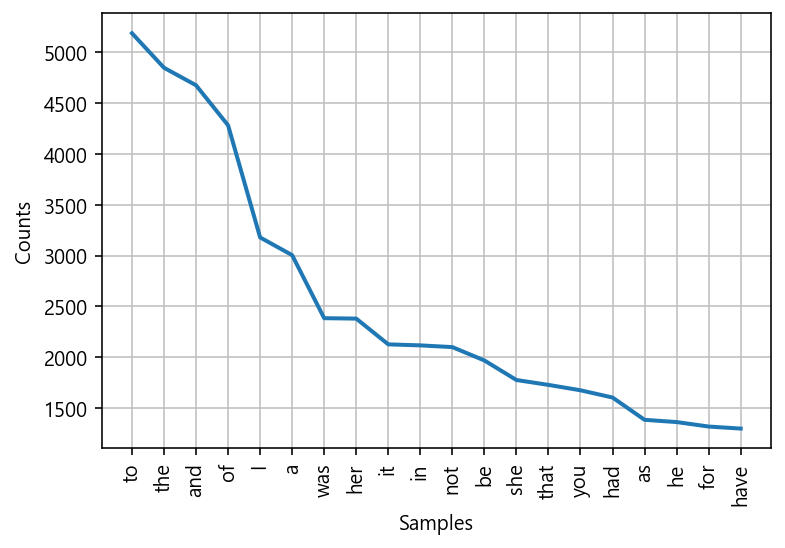

In [26]:
# plot 메소드를 통해 각 토큰의 사용 빈도를 시각화 가능

text.plot(20)
plt.show()

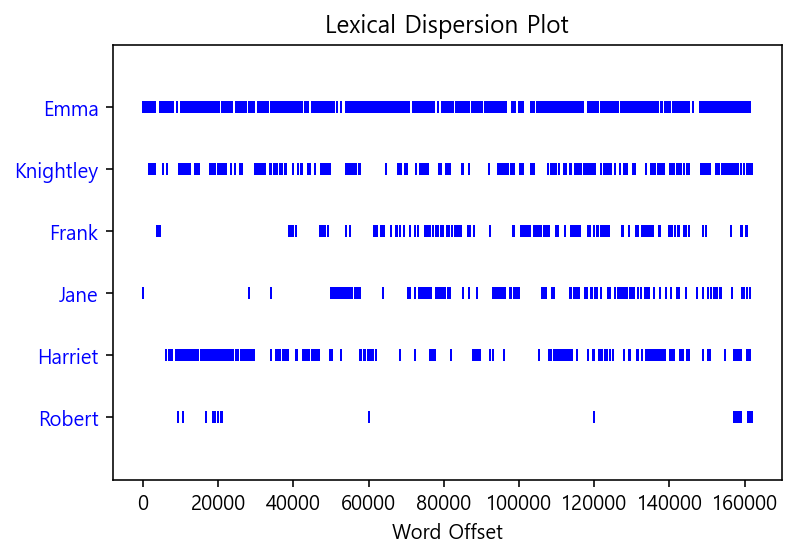

In [29]:
# dispersion_plot 메소드는 각 단어가 사용된 위치를 시각화
# 문서의 등장인물에 대해 적용한 결과

text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

In [30]:
# concordance
# 단어가 사용된 위치를 표시해 문맥을 확인

text.concordance("Emma")

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [31]:
# similar
# 같은 문맥에서 주어진 단어 대신 사용된 횟수가 높은 단어 반환
text.similar('Emma')

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [32]:
# common_contexts
# 두 단어의 공통 문맥 확인

text.common_contexts(["Emma", "she"])

said_i and_could but_could said_as and_was that_could and_felt
which_could that_began than_had but_was that_should this_could
there_was said_in as_could think_was as_felt that_was which_had


## FreqDist

문서에 사용된 토큰의 사용빈도를 vocab 메소드로 출력

In [33]:
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

In [34]:
# Emma corpus의 등장인물 이름을 모은 FreqDist 클래스 객체 생성
# NNP(고유대명사)이면서 불용어는 제거

from nltk import FreqDist

stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
emma_tokens = pos_tag(retokenize.tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names = FreqDist(names_list)

In [35]:
# 전체 단어의 수, Emma라는 단어의 출현 횟수, 확률

fd_names.N(), fd_names["Emma"], fd_names.freq("Emma")

(7863, 830, 0.10555767518758744)

In [36]:
# 출현 횟수가 가장 높은 단어

fd_names.most_common(5)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385)]

## WordCloud

단어의 출현 빈도를 이용해 워드클라우드 생성

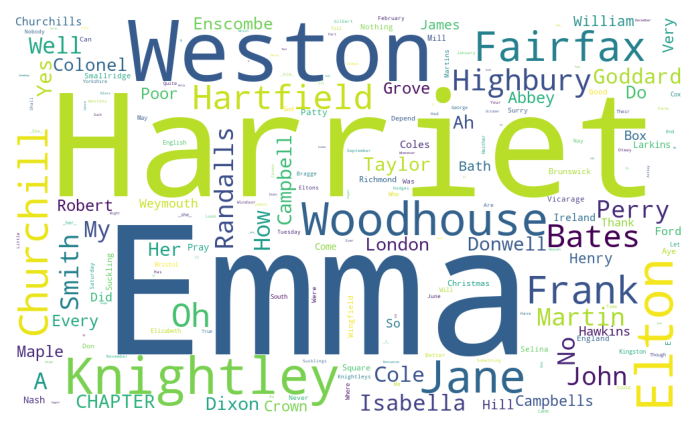

In [37]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show()